In [1]:
import pandas as pd
from tqdm import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
!pwd

/project/at082-group17/AT082_17_Leopard_Read


In [3]:
parse_dates = ['scheduledDate']
dataNameList = ['201801', '201802', '201803', '201804', '201805', '201806', '201807','201808', '201809', '201810', '201811', '201812', '201901', '201902' ,'201903']
df_all = pd.DataFrame()

for i, name in enumerate(tqdm_notebook(dataNameList)):
#for name in dataNameList:
    data = pd.read_csv('../data/2018_1_8/{}.csv'.format(name), parse_dates = parse_dates)
    df_all = pd.concat((df_all, data), axis = 0, ignore_index = False)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_all.head()

,recipientSn,campaignSn,mailAddress,domain,openedFlag,bouncedFlag,fromName,fromMailAddress,subject,scheduledDate
0,00000000606f8cfb0160af1258331bb9,00000000609630da0160af09b8626299,6a359cb4196db9a02c8d195b73f11374d65591365a37d8...,chwa.com.tw,Y,NaN,傑瑞老人安養中心,jerry.org101@gmail.com,傑瑞電子報第01期-3,2018-01-01 08:14:59
1,00000000606f8cfb0160af1258891bba,00000000609630da0160af09b8626299,804fdb3632b9c90532fb1abaa5945a8d869ca05b92e75a...,gmail.com,NaN,NaN,傑瑞老人安養中心,jerry.org101@gmail.com,傑瑞電子報第01期-3,2018-01-01 08:14:59
2,00000000606f8cfb0160af1258891bbb,00000000609630da0160af09b8626299,fa9ae8234796d6caf56919a79af59276f976e928bb65b5...,jerry.org.tw,Y,NaN,傑瑞老人安養中心,jerry.org101@gmail.com,傑瑞電子報第01期-3,2018-01-01 08:14:59
3,00000000606f8cfb0160af1258891bbc,00000000609630da0160af09b8626299,f58cab34ed3a0687423ecb6a22aba1a7cad758370428ea...,jerry.org.tw,NaN,NaN,傑瑞老人安養中心,jerry.org101@gmail.com,傑瑞電子報第01期-3,2018-01-01 08:14:59
4,00000000606f8cfb0160af1258891bbd,00000000609630da0160af09b8626299,cfeb0fe0bfb7d18f7a8c904ddeee0319e9f828eb1f2aff...,gmail.com,NaN,Y,傑瑞老人安養中心,jerry.org101@gmail.com,傑瑞電子報第01期-3,2018-01-01 08:14:59


# Weekday

In [5]:
df_all_week = df_all[['openedFlag', 'scheduledDate']]

In [6]:
df_all_week['weekday'] = df_all_week['scheduledDate'].dt.weekday

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
week_openrate = []
for i in range(7):
    week_openrate.append(len(df_all_week[(df_all_week['weekday'] == i) & (df_all_week['openedFlag'] == 'Y')]) / len(df_all_week[(df_all_week['weekday'] == i)]))

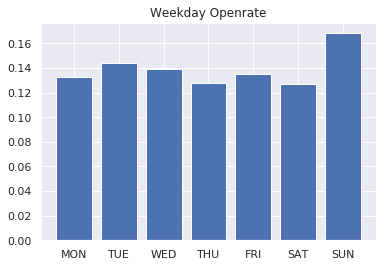

In [8]:
plt.figure()
plt.title("Weekday Openrate")
plt.bar(range(len(week_openrate)), week_openrate,
       color="b", align="center")
plt.xticks(range(len(week_openrate)), ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
plt.show()

In [9]:
week_count = []
for i in range(7):
    week_count.append(len(df_all_week[df_all_week['weekday'] == i]) / len(df_all_week))

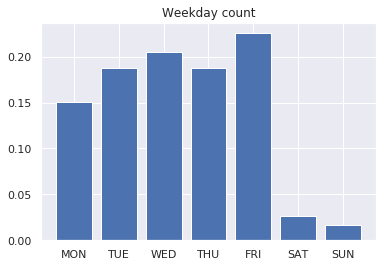

In [10]:
plt.figure()
plt.title("Weekday count")
plt.bar(range(len(week_count)), week_count,
       color="b", align="center")
plt.xticks(range(len(week_count)), ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
plt.show()

# Hour

In [11]:
df_all_hour = df_all[['openedFlag', 'scheduledDate']]

In [12]:
df_all_hour['hour'] = df_all_week['scheduledDate'].dt.hour

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_all_hour['hour'].nunique()

24

In [14]:
hour_openrate = []
for i in range(24):
    hour_openrate.append(len(df_all_hour[(df_all_hour['hour'] == i) & (df_all_hour['openedFlag'] == 'Y')]) / len(df_all_hour[(df_all_hour['hour'] == i)]))

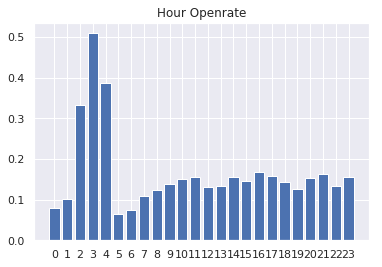

In [15]:
plt.figure()
plt.title("Hour Openrate")
plt.bar(range(len(hour_openrate)), hour_openrate,
       color="b", align="center")
plt.xticks(range(len(hour_openrate)), range(24))
plt.show()

In [16]:
hour_count = []
for i in range(24):
    hour_count.append(len(df_all_hour[df_all_hour['hour'] == i]) / len(df_all_hour))

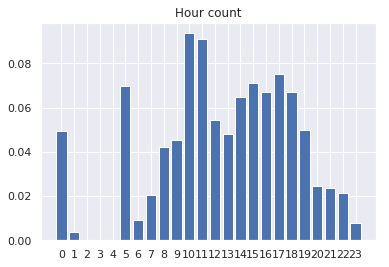

In [17]:
plt.figure()
plt.title("Hour count")
plt.bar(range(len(hour_count)), hour_count,
       color="b", align="center")
plt.xticks(range(len(hour_count)), range(24))
plt.show()

# fromMail  

In [94]:
df_all_from = df_all[['openedFlag', 'fromMailAddress']]

In [95]:
df_all_from['openedFlag'] = df_all_from['openedFlag'].fillna('N')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
fromMailAddress_list = df_all_from['fromMailAddress'].unique()

In [97]:
frommail_count = df_all_from.groupby(['fromMailAddress', 'openedFlag'])['openedFlag'].count()
frommail_count.head(10)

fromMailAddress            openedFlag
 biolasco@biolasco.com.tw  N              3257
                           Y               876
 edm@pekoe.com.tw          N             64301
                           Y              4394
 elleshop@allyoung.com.tw  N             21721
                           Y               612
 fans@e-payless.com.tw     N              6119
                           Y              2695
 leaderstock@gmail.com     N                97
                           Y                 7
Name: openedFlag, dtype: int64

### 去除只開或只不開

In [98]:
a = list(frommail_count.index)

In [99]:
count = {}
for i in a:
    if (i[0] in fromMailAddress_list) & (i[0] in count):
        count[i[0]] += 1
    elif (i[0] in fromMailAddress_list) & (i[0] not in count):
        count[i[0]] = 1

In [100]:
mail_only_no_yes = []
for key, values in count.items():
    if values == 1:
        mail_only_no_yes.append(key)

In [101]:
len(mail_only_no_yes)

435

In [102]:
df_all_from = df_all_from[~df_all_from['fromMailAddress'].isin(mail_only_no_yes)]

In [103]:
df_all_from.head()

,openedFlag,fromMailAddress
0,Y,jerry.org101@gmail.com
1,N,jerry.org101@gmail.com
2,Y,jerry.org101@gmail.com
3,N,jerry.org101@gmail.com
4,N,jerry.org101@gmail.com


In [104]:
frommail_count = df_all_from.groupby(['fromMailAddress', 'openedFlag'])['openedFlag'].count()
frommail_count.head(10)

fromMailAddress            openedFlag
 biolasco@biolasco.com.tw  N              3257
                           Y               876
 edm@pekoe.com.tw          N             64301
                           Y              4394
 elleshop@allyoung.com.tw  N             21721
                           Y               612
 fans@e-payless.com.tw     N              6119
                           Y              2695
 leaderstock@gmail.com     N                97
                           Y                 7
Name: openedFlag, dtype: int64

In [107]:
import numpy as np

not_open = np.array(frommail_count[0:][::2])
do_open = np.array(frommail_count[1:][::2])
from_open_rate = do_open / (do_open + not_open)

Text(0.5,1,'Sender Openrate')

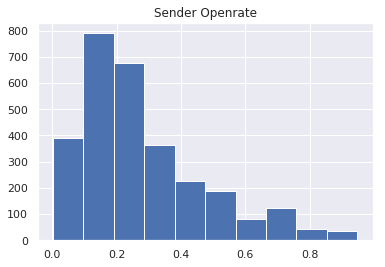

In [110]:
plt.hist(from_open_rate)
plt.title('Sender Openrate')

# mailAddress

In [116]:
df_all_get = df_all[['openedFlag', 'mailAddress']]

In [117]:
getMailAddress_list = df_all_get['mailAddress'].unique()

In [118]:
len(getMailAddress_list)

12550226

In [120]:
getmail_count = df_all_get.groupby(['mailAddress', 'openedFlag'])['openedFlag'].count()
getmail_count.head(10)

mailAddress                                                                                                                       openedFlag
00000a0691945a6a43f307d3ec66ddeacfd70865b8772e5f3a0bff8f05a91f226cd30bf4b8a4723eeb77cce2f3244cb9900ee1851f0a45d9d2f64d8a0130040d  Y             12
00000e413d7802c6dfd228c2069d86b3ff911558c4c00a95ad73fcb6134eeeed33e0dad25f8ccc45ef8163f93052d087b4eb2befd0ae83163efbb14bc6a7266f  Y              1
000014d700493267a0dbc1cf5ce1e359ecf74c12652d43c812f7ceb59c4194d270f577e4a3772c2810a403ed970184fa6f46b314255fa4173f885db568f97bdc  Y              2
0000216c95b00715b577475e5b2d74f44fa881ca97f32f927b8879c7d2d6f08019d7212ccebc140f363714b39ae22030eeb31867939b35d897cdd430cae7c00a  Y              1
000022275fdbbe95981a6e55a104c0fe0d7de3385a8951ee3186776b318c88a09828c3fb1917f41ac346e76c0acb740a0700c4b33d487c4e6dd18bd83f634a3c  Y              6
000023f7cd0f2daae315c6b265116b5ec9344d686e250c858febf24f051cefb598e71971a601b2749bbf657ce8ab8cf1f2d9e3d7874f9ada4123098ffb6b